# POSTTEST6 
## Agditha Evalyn Lolongan
## 2109106030

## Unspervised Learning

In [2]:
# import library
import pandas as pd
import seaborn as sns
import warnings

## Import dataset

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Mengecek attribut jika ada null

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data scalling dan buat subset

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
df_subset = df[['age', 'bmi']]

In [8]:
ss = StandardScaler()

In [9]:
x_scaled = ss.fit_transform(df_subset)

## Algoritma K-MEANS

In [10]:
from sklearn.cluster import KMeans

In [11]:
model_kmeans = KMeans(n_clusters = 4, random_state = 0)

In [12]:
model_kmeans.fit(x_scaled)

KMeans(n_clusters=4, random_state=0)

In [13]:
# Untuk liat sapa aja yg udah dijadiin label
labels = model_kmeans.labels_
print(labels)

[2 1 1 ... 1 2 0]


## Evaluasi KMeans dengan crossTab

In [14]:
df_kmeans = pd.DataFrame({'labels' : labels, 'region': df.region})

In [15]:
ct1 = pd.crosstab(df_kmeans['labels'], df_kmeans['region'])

print(ct1)

region  northeast  northwest  southeast  southwest
labels                                            
0              97        104         71         89
1              49         58        119         73
2             107        101         63         87
3              71         62        111         76


## Melihat centroid

In [16]:
import matplotlib.pyplot as plt

In [17]:
xs = x_scaled[:, 0]
ys = x_scaled[:,1]

In [18]:
centroids = model_kmeans.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

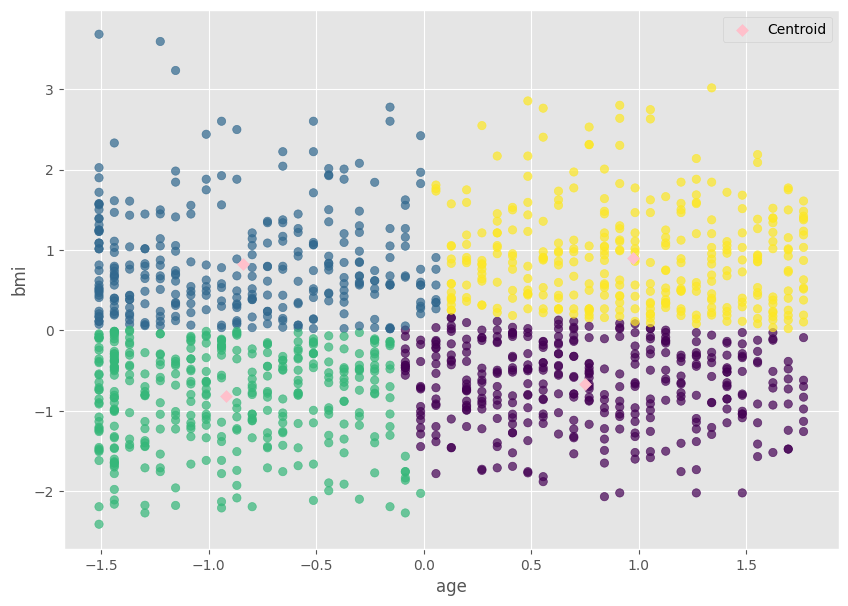

In [19]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
plt.scatter(xs, ys, c = labels, alpha = 0.7)
plt.scatter(centroids_x, centroids_y, c = "pink", marker = 'D', label = "Centroid")
plt.xlabel("age")
plt.ylabel("bmi")
plt.legend()
plt.show()

## Inertia

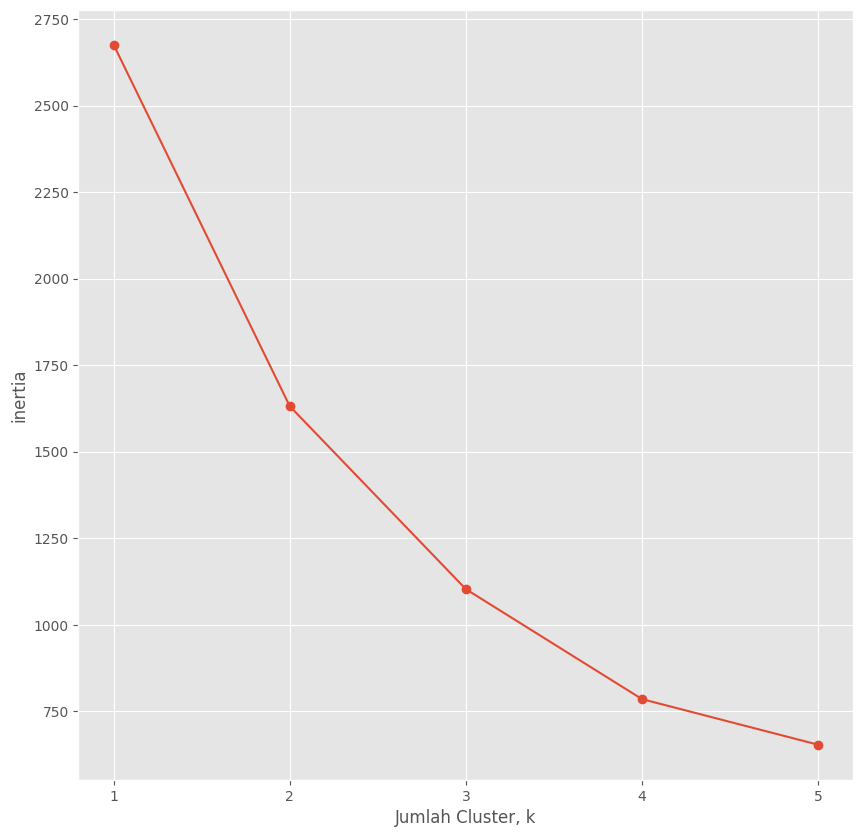

In [20]:
ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)

# Plot ks vs inertias (seberapa bagus dia clusteringnya)
# Jadi cluster yang baik model nya dikit sm inertianya juga banyak
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()